### 머신러닝 연습 - 분류

In [2]:
# 데이터 가져오기

import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("../titanic.csv")

print(df.head())  # 데이터 확인

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# 데이터 체크

# 1. 필요없는 특징(노이즈) 제거
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])


# 2. 레이블의 값 개수 확인
print(df['Survived'].value_counts())
    # value_counts(): 열의 각 값의 개수를 반환


# 3. 결측치 확인, 없애기
print(df.isnull().sum()) # 결측치 확인

df.drop(columns=['Cabin'], inplace=True) # Cabin 컬럼 삭제
    # inplace=True: 변경사항을 df에 덮어쓰겠다는 뜻. 기본적으로 컬럼(열) 변경 함수는 바뀐 결과를 반환해 새 변수에 할당하게 할 뿐, df 자체를 바꾸지는 않음. inplace=True를 쓰면 df 자체가 변화하게 됨.

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # Embarked 결측치 채우기 (최빈값(가장 많이 등장한 값)으로 채우기)
    # fillna: 데이터의 결측값을 원하는 값으로 변경하는 메서드
    # mode()[0]: 특정 데이터의 최빈값을 반환. 최빈값은 여러개일 수 있으므로 첫 번째 최빈값([0])만 가져옴.

df['Age'].fillna(df['Age'].mean(), inplace=True) # Age 결측치 채우기 (평균값으로 채우기)
    # mean(): 특정 데이터의 평균값을 반환.

print(df.isnull().sum()) # 결측치 다시 확인


# 4. One-Hot 인코딩: 각각의 값마다 열(속성)을 새로 만듦. 각 속성은 true, false값을 가짐.
df = pd.get_dummies(df, columns=["Embarked"])  # 원-핫 인코딩
df = pd.get_dummies(df, columns=["Sex"])

print(df.head())  # 데이터 확인

Survived
0    549
1    342
Name: count, dtype: int64
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
   Survived  Pclass   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3  22.0      1      0   7.2500       False       False   
1         1       1  38.0      1      0  71.2833        True       False   
2         1       3  26.0      0      0   7.9250       False       False   
3         1       1  35.0      1      0  53.1000       False       False   
4         0       3  35.0      0      0   8.0500       False       False   

   Embarked_S  Sex_female  Sex_male  
0        True       False      True  
1       False        True     False  
2        True        True     False  
3        True        True     False  
4        True     

C:\Users\jt341\AppData\Local\Temp\ipykernel_11808\1049436188.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # Embarked 결측치 채우기 (최빈값(가장 많이 등장한 값)으로 채우기)
C:\Users\jt341\AppData\Local\Temp\ipykernel_11808\1049436188.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

In [4]:
# x, y, test, train 나누기

from sklearn.preprocessing import StandardScaler  # 데이터 표준화 함수
from sklearn.model_selection import train_test_split  # 데이터 분할 함수

# [데이터 제작]
X = df.drop(columns=["Survived"])
y = df["Survived"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # test_size: 전체 데이터 중 test에 할당할 비율

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 10), (179, 10), (712,), (179,))

In [ ]:
# 외전. 레이블 불균형 해결하기(균형 맞추기)
# 얘는 그냥 참고용. 여기서 만든 변수는 사용하지 않았음.

# **방법 1. 언더샘플링: 데이터 양이 많은 쪽 개수를 줄임. 데이터가 많을 때만 사용.
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['Survived'])  # 입력 데이터
y = df['Survived']  # 레이블

# 언더샘플링 적용
under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X, y) # X_under, y_under가 샘플링 후 결과물

# 결과 확인
print(y_under.value_counts())
print("---------------------")


# **방법 2. 오버샘플링: 데이터 양이 적은 쪽 행을 복사해 늘림. 데이터가 적을 때 사용 but 단순 복사로 늘리기 때문에 과적합 위험 있음.
from imblearn.over_sampling import RandomOverSampler

X = df.drop(columns=['Survived'])  # 입력 데이터
y = df['Survived']  # 레이블

# 오버샘플링 적용
over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X, y) # X_over, y_over가 샘플링 후 결과물

# 결과 확인
print(y_over.value_counts())
print("---------------------")


# **방법 3. SMOTE: 일반적으로 가장 많이 사용. 기존 데이터 기반으로 새로운 데이터를 생성해 오버샘플링.
# 주의: 얘는 모든 데이터가 숫자일 때만 작동! 인코딩 먼저 해야 함.
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Survived'])  # 입력 데이터
y = df['Survived']  # 레이블

# SMOTE 적용
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y) # X_smote, y_smote가 샘플링 후 결과물

# 결과 확인
print(y_smote.value_counts())

Survived
0    342
1    342
Name: count, dtype: int64
---------------------
Survived
0    549
1    549
Name: count, dtype: int64
---------------------
Survived
0    549
1    549
Name: count, dtype: int64


In [5]:
# 모델 생성, 학습, 평가

from sklearn.metrics import accuracy_score  # 정확도 평가 함수

# [DT 모델]
from sklearn.tree import DecisionTreeClassifier

# 모델 생성, 훈련
dt_model = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=3, max_depth=3, random_state=42)
    # **max_depth=3: 트리의 최대 깊이를 3으로 제한. 깊이가 줄어든 만큼 조건을 덜 체크하므로 정확도 하락 but 과적합 감소
    # **min_samples_spilt=5: 한 노드에서 샘플이 최소 5개여야만 다음 노드로 넘어감(= 샘플을 나눔). 정확도 하락 but 과적합 감소
    # **min_samples_leaf=2: 최하단 노드(잎)는 샘플이 최소 2개 있어야 함. 샘플을 너무 작게 나누는 걸 방지해 정확도 하락 but 과적합 감소
dt_model.fit(X_train, y_train)

# 모델 예측, 평가
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"DT 테스트 정확도: {accuracy:.2f}")


# [RF 모델]
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
    # n_estimators=100: DT 모델을 100개 사용. 많으면 성능 향상 but 계산량 증가
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"RF 테스트 정확도: {accuracy:.2f}")


# [SVM 모델]
from sklearn.svm import SVC

svm_model = SVC(kernel="linear", C=10, random_state=42)
    # C: 마진. C가 작을수록 마진이 커지고, 마진이 클수록 훈련 데이터에 맞아져 과적합 가능성 증가
    # kernel="linear": 커널 종류가 선형. 자료들을 나누는 구분선 형태를 선형/비선형(곡선 등) 등에서 하나를 선택하는 것. rbf, poly, sigmoid 등 다양함.

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM 테스트 정확도: {accuracy:.2f}")


# [LR 모델]
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')
    # multi_class='ovr': 다중 분류를 할 때, 여러 다중 분류 방법 중 하나(ovr은 One-vs-Rest 방식)를 선택. 이진 분류는 True/False만 분류하고, 다중 분류는 3개 이상의 종류를 분류하는 것
    # ovr: 여러 종류를 '현재 종류 vs 나머지 종류'식으로 여러 개의 이진 문제로 바꿈.
    # multinomial(소프트맥스): 모든 종류에 대해 확률을 계산한 뒤, 가장 높은 확률의 종류로 예측.
    # 현재 multi_class='ovr'을 넣으면 경고가 발생해서 제거해 둠
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"LR 테스트 정확도: {accuracy:.2f}")


# [KNN 모델]
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # k=5로 설정
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN 테스트 정확도: {accuracy:.2f}")


print()


# [외전. 교차 검증]
from sklearn.model_selection import cross_val_score
dt_scores = cross_val_score(dt_model, X, y, cv=5)  # **K 폴드 교차검증: test 데이터가 아닌 전체 데이터를 cv개의 폴드로 나눠 각 폴드마다 테스트
print(f"DT 교차 검증 평균 정확도: {dt_scores.mean():.2f}")

rf_scores = cross_val_score(rf_model, X, y, cv=5)  # **K 폴드 교차검증: test 데이터가 아닌 전체 데이터를 cv개의 폴드로 나눠 각 폴드마다 테스트
print(f"RF 교차 검증 평균 정확도: {rf_scores.mean():.2f}")

svm_scores = cross_val_score(svm_model, X, y, cv=5)  # **K 폴드 교차검증: test 데이터가 아닌 전체 데이터를 cv개의 폴드로 나눠 각 폴드마다 테스트
print(f"SVM 교차 검증 평균 정확도: {svm_scores.mean():.2f}")

lr_scores = cross_val_score(lr_model, X, y, cv=5)  # **K 폴드 교차검증: test 데이터가 아닌 전체 데이터를 cv개의 폴드로 나눠 각 폴드마다 테스트
print(f"LR 교차 검증 평균 정확도: {lr_scores.mean():.2f}")

knn_scores = cross_val_score(knn_model, X, y, cv=5)  # **K 폴드 교차검증: test 데이터가 아닌 전체 데이터를 cv개의 폴드로 나눠 각 폴드마다 테스트
print(f"KNN 교차 검증 평균 정확도: {knn_scores.mean():.2f}")

DT 테스트 정확도: 0.80
RF 테스트 정확도: 0.80
SVM 테스트 정확도: 0.78
LR 테스트 정확도: 0.81
KNN 테스트 정확도: 0.80

DT 교차 검증 평균 정확도: 0.81
RF 교차 검증 평균 정확도: 0.82
SVM 교차 검증 평균 정확도: 0.79
LR 교차 검증 평균 정확도: 0.79
KNN 교차 검증 평균 정확도: 0.80


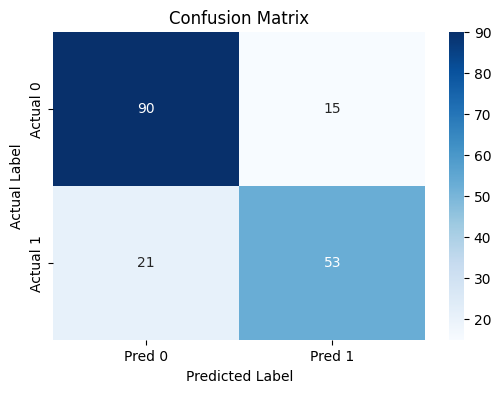

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [6]:
# 다양한 방법으로 모델 평가

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 예측값과 실제값 비교
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# 정밀도, 재현율, F1-score 출력
print(classification_report(y_test, y_pred))